# Week 5

Phew. You've handed in the assignment. But there's no resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* Then, in part 2, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

## Part 1: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. You had to read Chapter 3, which is about visualizing data with two variables, before coming to class today. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You can find it on Teams in the** `files` **tab**.

And now a few exercises to reflect on the text:

*Exercise:* Questions from DAOST Chapter 3. <font color=gray>Read the text and answer the questions to make sure you get it. No need for LLMs here</font>

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?

He means to say that there is clear trend. As he also states the $x$ and $y$ parameters are definitely related, so the noise want come from *outliers* in the dataset; it will be observation noise, if anything.

> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?




> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?


> * What are residuals? Why is it a good idea to plot the residuals of your fit?


> * Explain in your own words the point of the smooth tube in figure 3-7.


> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?


> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SAVE_PATH = "plots/Week5/"

In [69]:
FILENAME = "data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv"
crime_df = pd.read_csv(FILENAME)
crime_df = crime_df[crime_df["Date"].str.contains("2018") == False] # Remove 2018 data

print(crime_df.head())

             PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek        Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday  11/22/2004  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday  10/18/2005  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday  02/15/2004  02:00   SOUTHERN       NONE   
3                  ARSON    Friday  02/18/2011  05:27  INGLESIDE       NONE   
4                BATTERY    Sunday  11/21/2010  17:00   SOUTHERN       NONE   

   ... Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  \
0  ...                                NaN                      NaN   
1  ...

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover? <font color=gray>First think, use your brain to answer, then it's OK to get further inspiration from your LLM. The same goes for the next little question.</font>

It will help you discover an exponential relationship.

>    * What kind of functions will loglog plots help you see?

If the changes in two parameters corresponds to the same relative change, but the underlying in change is significantly different, then both parameters (in a sense) are $\log$-scaled.


> * Second, create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. Comment on what the plot looks like. Do any new insights arise?

It seems to almost be an exponential relationship. I don't know if this provides any new insights, but it goes to show that there is a **lot** more *Larcency/ theft* than *Sex offences, non forcible* and *trea* (whatever that last one is).


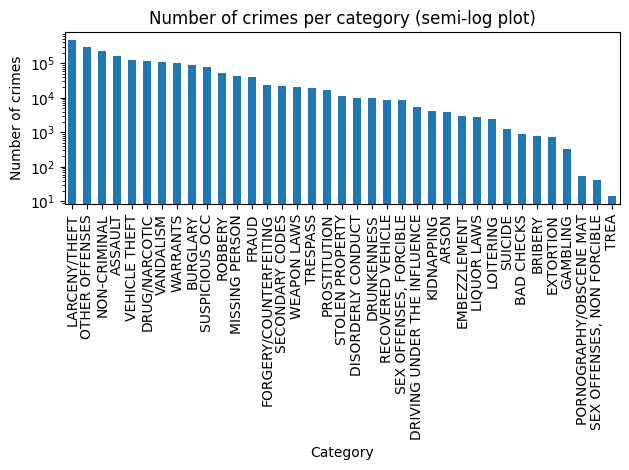

In [70]:
# Plot number of crimes per category (semi-log plot)

crime_df['Category'].value_counts().plot(kind='bar', logy=True)
plt.title("Number of crimes per category (semi-log plot)")
plt.xlabel("Category")
plt.ylabel("Number of crimes")
plt.tight_layout()
plt.savefig(SAVE_PATH + "crimes_per_category_semi_log.png")
plt.show()

> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. <font color=gray>It's OK use LLMs as much as you can for this one</font>
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. We've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>       * **Hint 4**. Ask your LLM.
>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

In [71]:
from utils.distance_funcs import haversine

# Filter the data to the only contain points within in the San Francisco peninsula
df_SF = crime_df[(crime_df["Y"] < 50) & (crime_df["X"] < -122)]

# Find the square that encapsulates San Francisco
lat_min = df_SF["Y"].min()
lat_max = df_SF["Y"].max()
lon_min = df_SF["X"].min()
lon_max = df_SF["X"].max()

# Figuring out how many bins we need to get 100m x 100m bins
# We multiply the output by 10 since the function returns the distance in kilometers,
# and we want to know the distance per 100m
print(f"Estimated bin amount along the western border of San Francisco: {haversine(lon_min, lat_min, lon_min, lat_max)*10}") 
print(f"Estimated bin amount along the eastern border of San Francisco: {haversine(lon_max, lat_min, lon_max, lat_max)*10}")

Estimated bin amount along the western border of San Francisco: 125.36317921721148
Estimated bin amount along the eastern border of San Francisco: 125.36317921721148


In [72]:
# Distance along the longitude changes depending on the latitude as also seen below.
# Imagine moving 90 degrees when you're close to the north pole. You are not moving a lot of kilometers.
# Moving 90 degrees a long equator though, that is a long walk!
# Since San Fransisco is relatively small in the big picture the difference is not that big as we can see,
# so we just assume it's flat even though we clearly see it is not.
print(f"Estimated bin amount along the northern border of San Francisco: {haversine(lon_min, lat_max, lon_max, lat_max)*10}")
print(f"Estimated bin amount along the southern border of San Francisco: {haversine(lon_min, lat_min, lon_max, lat_min)*10}")

Estimated bin amount along the northern border of San Francisco: 130.78123566673807
Estimated bin amount along the southern border of San Francisco: 130.9807444161078


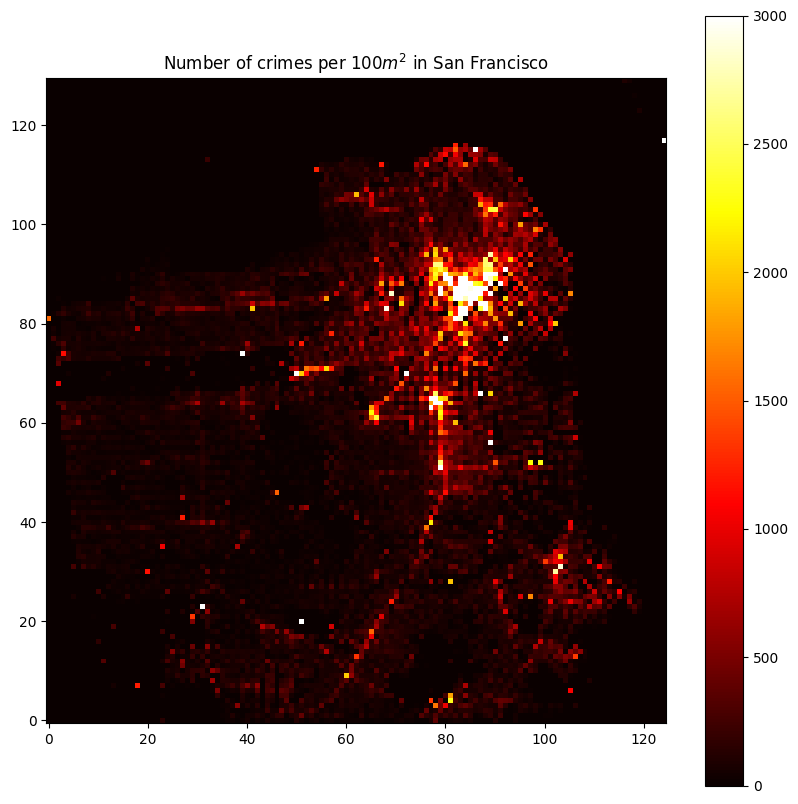

In [73]:
# now we know we need to get 130 x 125 bins to get 100m x 100m
ROWS = 130
COLS = 125
count, lon, lat = np.histogram2d(df_SF["Y"], df_SF["X"], bins = [ROWS, COLS])

# Just to convince ourselves that what we have done makes sense we plot the counts.
plt.figure(figsize=(10,10))
plt.title("Number of crimes per $100m^2$ in San Francisco")
plt.imshow(count, cmap='hot',vmax=3000, origin='lower')
plt.colorbar()
plt.savefig(SAVE_PATH + "crime_heatmap_SanFrancisco.png")
plt.show()

In [74]:
print(count.shape)

(130, 125)


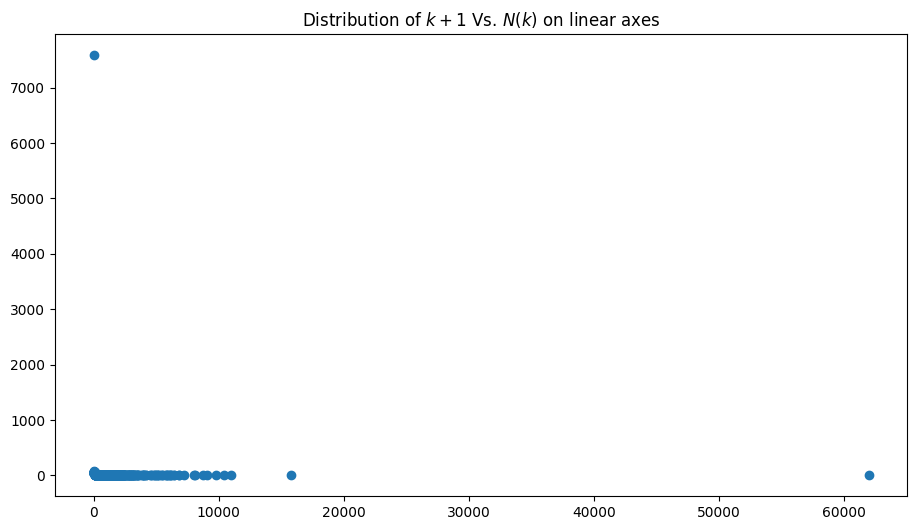

In [75]:
N_k = {}

# make a dictionary of the counts
for i in range(ROWS):
    for j in range(COLS):
        count_ij = int(count[i, j])
        if count[i, j] in N_k:
            N_k[count_ij] += 1
        else:
            N_k[count_ij] = 1


# plot the distribution of k + 1 Vs. N(k) on linear axes 
plt.figure(figsize=(11, 6))
plt.title("Distribution of $k + 1$ Vs. $N(k)$ on linear axes")
plt.plot(N_k.keys(), N_k.values(), 'o')
plt.savefig(SAVE_PATH + "k_Vs_Nk_linear.png")
plt.show()



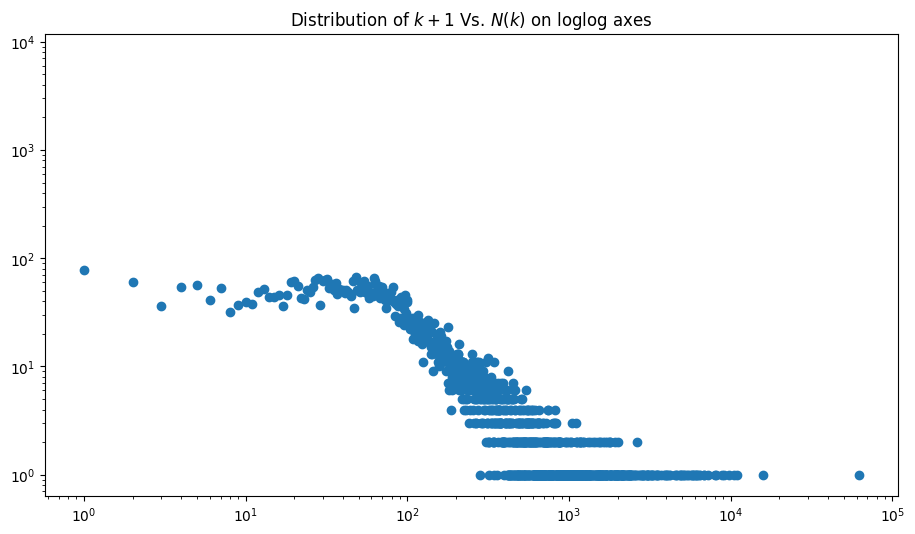

In [76]:
# plot the distribution of k + 1 Vs. N(k) on loglog axes 
plt.figure(figsize=(11, 6))
plt.title("Distribution of $k + 1$ Vs. $N(k)$ on loglog axes")
plt.loglog(N_k.keys(), N_k.values(), 'o')
plt.savefig(SAVE_PATH + "k_Vs_Nk_loglog.png")
plt.show()

It seems like Sune was right in his assumption that there is a power law distribution of theft.

## Part 2: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question. <font color=gray>It's OK to use your LLM for all aspects of this one<font>.

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).* Below I list the focus-crimes for your convenience


The two most similar are definitely **DRUNKENESS** and **DRIVING UNDER THE INFLUENCE**. It almost seems like the two most dissimilar are **PROSTITUTION** and **DISORDERLY CONDUCT**.

In [77]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 14 focus crimes that results in 91 pairwise comparisons. 

*Exercise*: Create the 91 scatterplots.
> * Display the plots in a $7$ by $13$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

In [81]:
FILENAME = "data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv"
crime_df = pd.read_csv(FILENAME)
crime_df = crime_df[crime_df["Date"].str.contains("2018") == False] # Remove 2018 data

crime_df['DateTime'] = pd.to_datetime(crime_df['Date'].astype(str) + ' ' + crime_df['Time'].astype(str))

focus_df = crime_df[crime_df['Category'].isin(focuscrimes)]

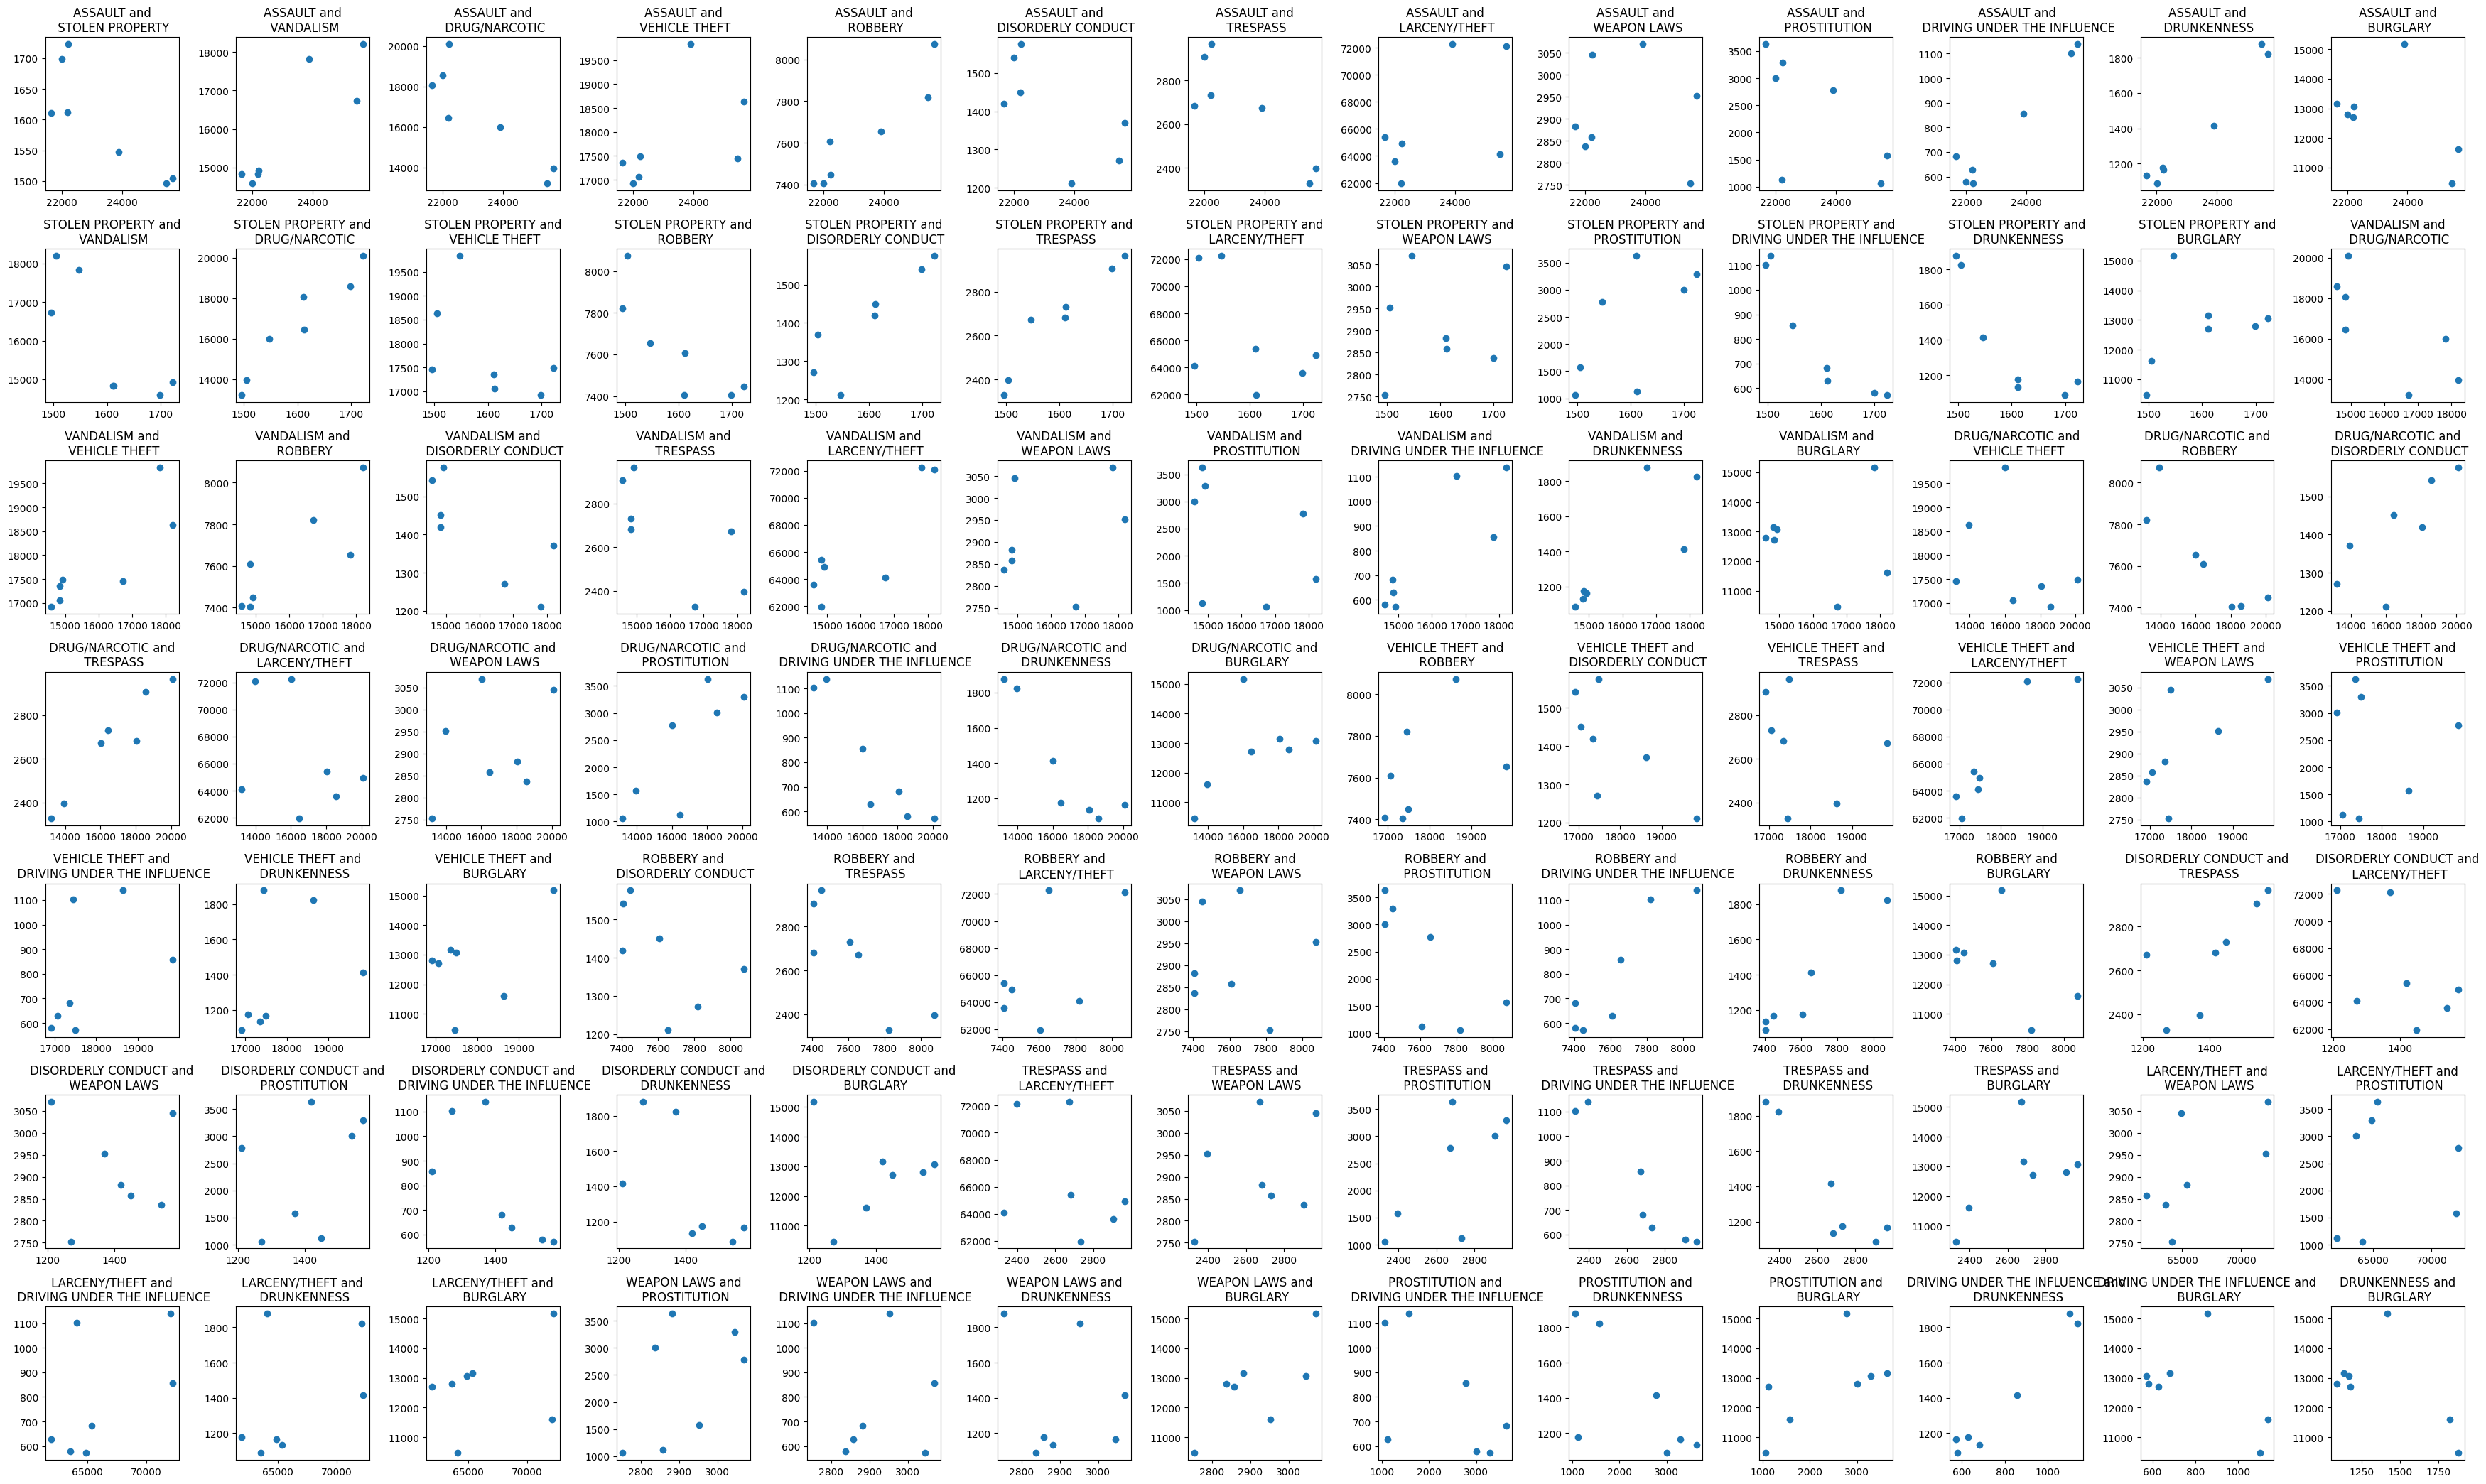

In [90]:
import itertools

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# All 91 pairwise combinations of focuscrimes
focuscrimes_combinations = list(itertools.combinations(focuscrimes, 2))
assert len(focuscrimes_combinations) == 91, "There should be 91 combinations of focuscrimes!!"

day_range = range(len(days))

plt.figure(figsize=(35, 21))
for i, (focuscrime1, focuscrime2) in enumerate(focuscrimes_combinations):
    plt.subplot(7, 13, i + 1)
    counts_crime1 = focus_df["DayOfWeek"][focus_df["Category"] == focuscrime1].value_counts().reindex(days)
    counts_crime2 = focus_df["DayOfWeek"][focus_df["Category"] == focuscrime2].value_counts().reindex(days)
    plt.title(f"{focuscrime1} and\n {focuscrime2}")
    plt.scatter(counts_crime1, counts_crime2)
    
plt.tight_layout()
plt.savefig(SAVE_PATH + "focuscrimes_correlation_weekly.png")
plt.show()

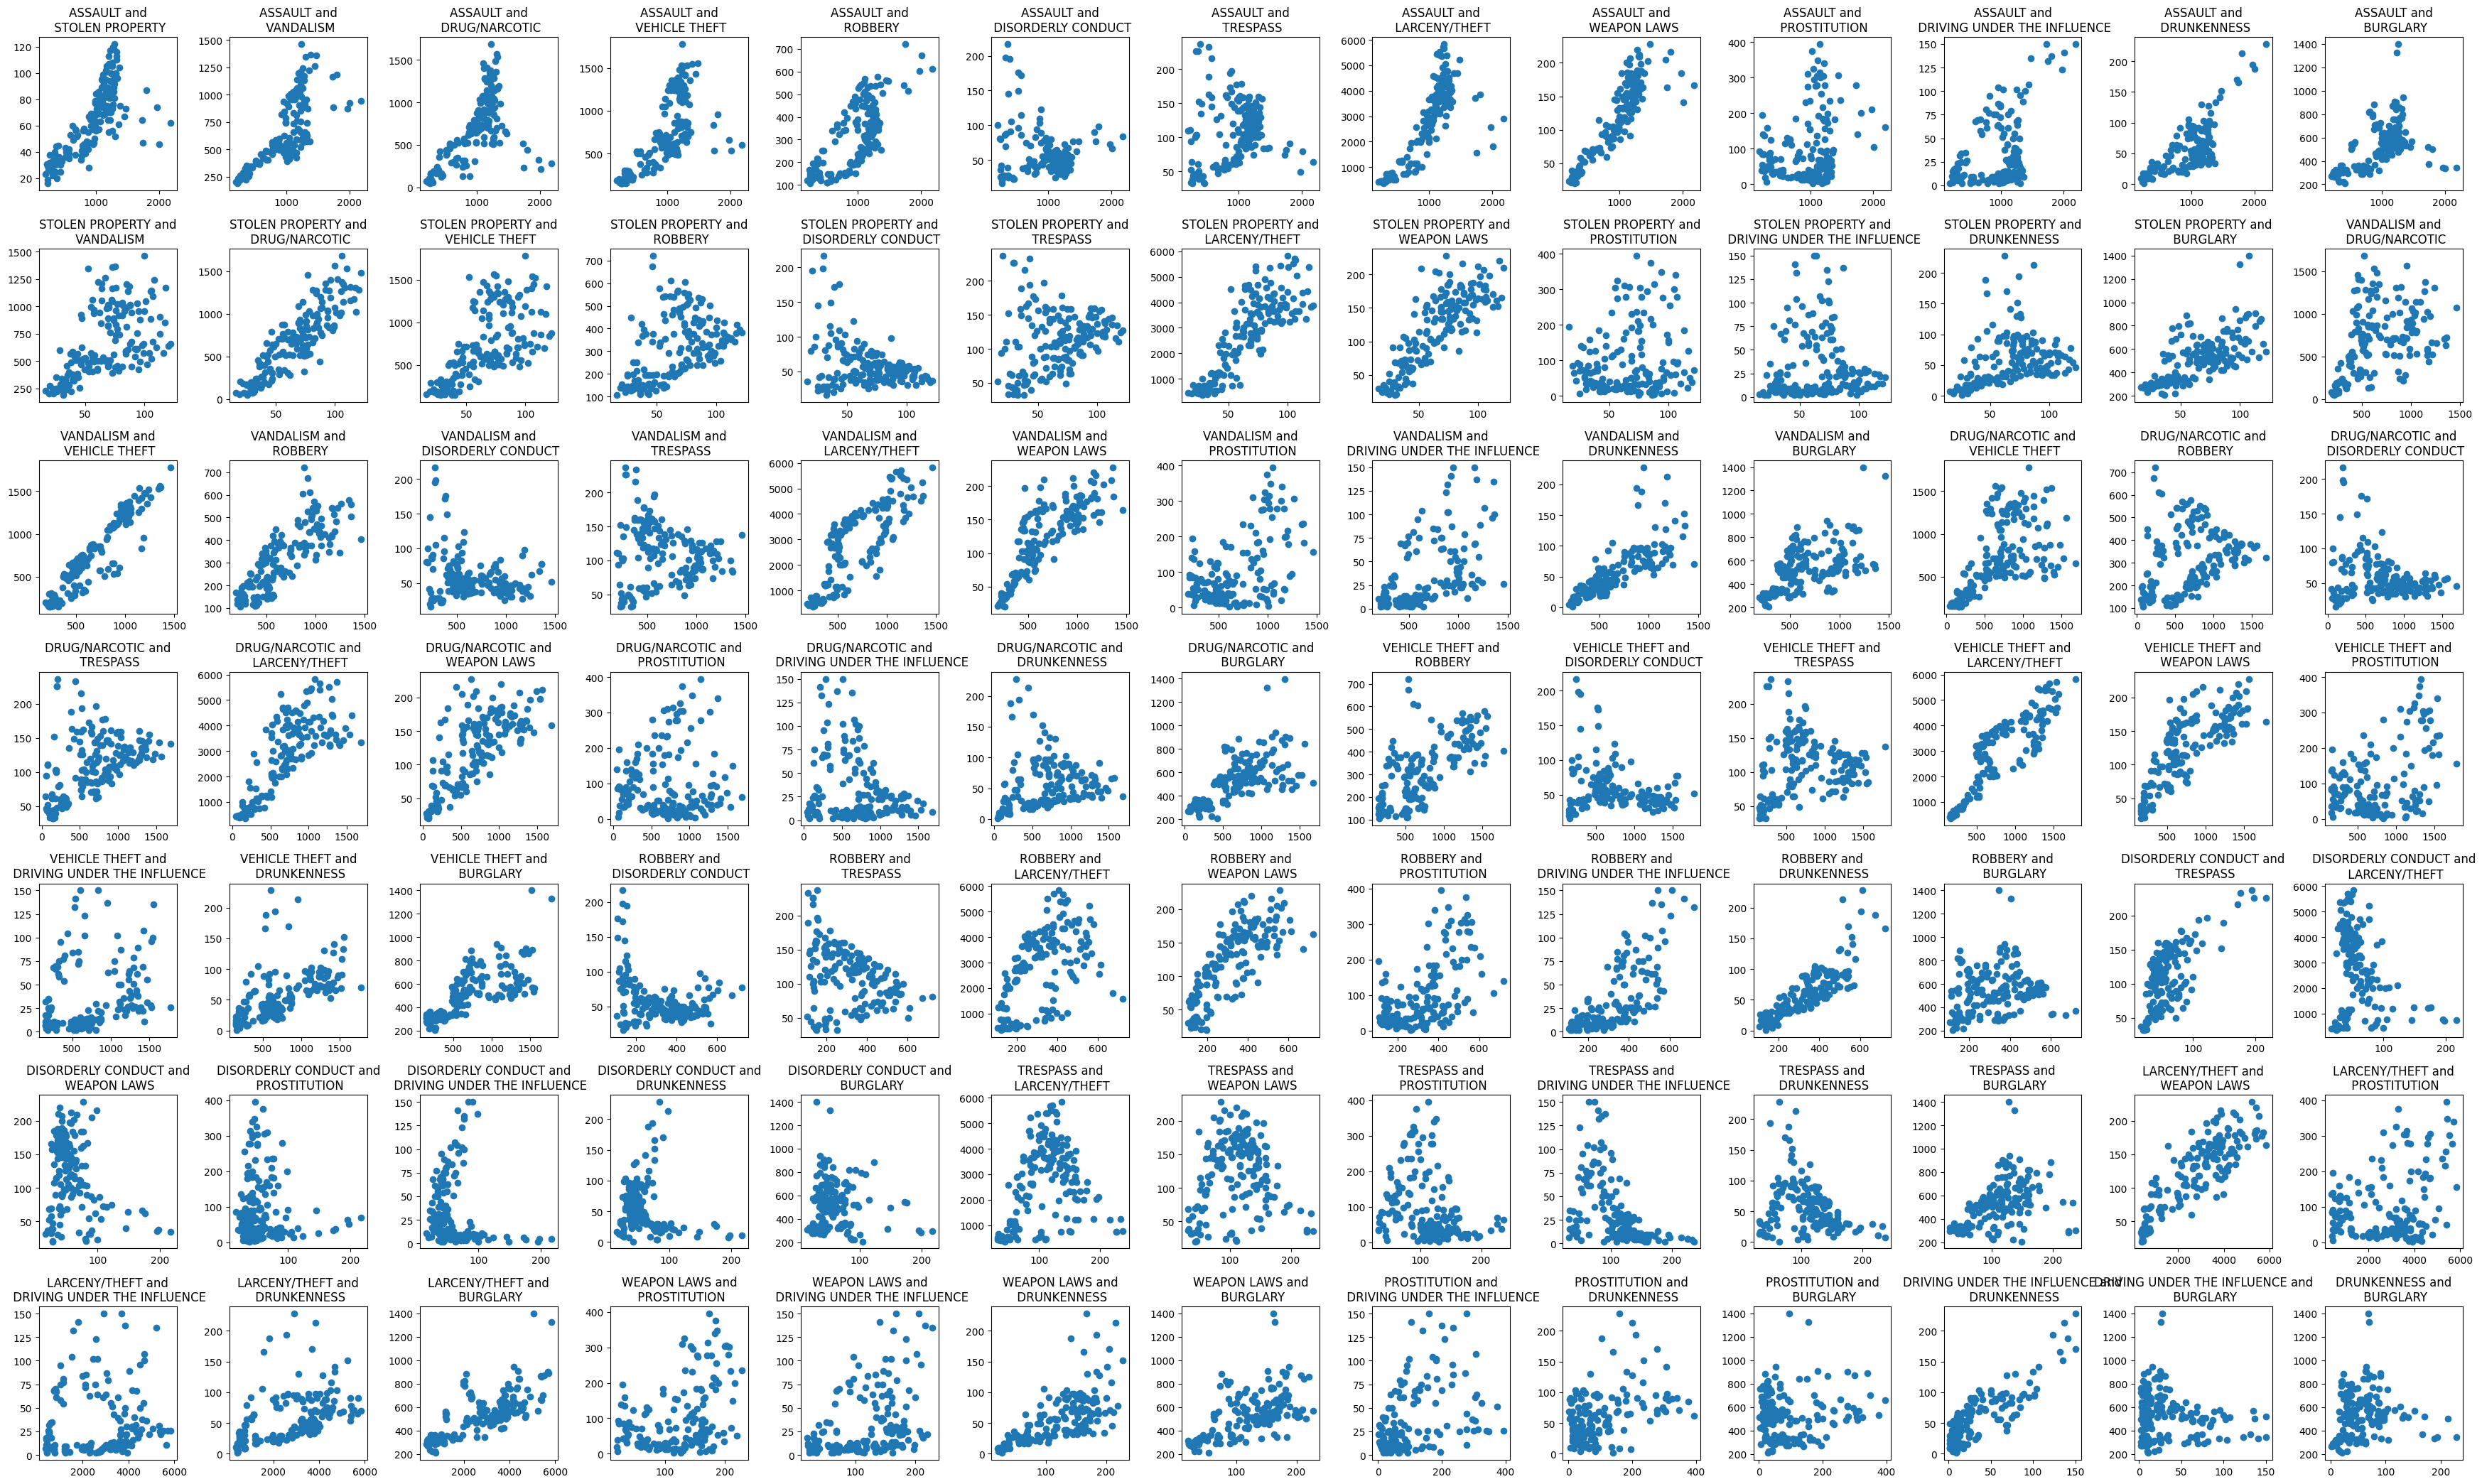

In [89]:
time_week_df = focus_df.groupby([focus_df["DateTime"].dt.weekday*24 + focus_df["DateTime"].dt.hour, 'Category'])
time_week_df = time_week_df['Date'].count().unstack()

plt.figure(figsize=(35, 21))
for i, (focuscrime1, focuscrime2) in enumerate(focuscrimes_combinations):
    plt.subplot(7, 13, i + 1)
    plt.title(f"{focuscrime1} and\n {focuscrime2}")
    plt.scatter(time_week_df[focuscrime1], time_week_df[focuscrime2])
    
plt.tight_layout()
plt.savefig(SAVE_PATH + "focuscrimes_correlation_hourly_weekly.png")
plt.show()

---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, I actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise:* Linear regression. 

> * Using Equation 1 and 2 above, calculate the slopes for $a$ and $b$ in each case and add them to the plot. (You are free to compare the results with ones obtained using a package like `sklearn` to check that everything is working as expected.) <font color=gray>See if you can do this by yourself without LLM help</font>.
> * You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue). <font color=gray>It's OK use full LLM help here</font>
> * Do any patterns stand out as you inspect the plot? Mention one or two that catch your eye -- it may be both because the sequences are similar or because they are different, or something entirely different altogether.

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit. (Again you can compare it with a package to check that it works, e.g. the one provided by the function `score()` in `sklearn`.) <font color=gray>Try this without the help of an LLM.</font>
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). <font color=gray>Try this without the help of an LLM, at least first. Then you may ask it to see if you got it right.</font>
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not? Does it corresponds with your observations from the previous exercise?
> * Create a final mega-plot with all of the 91 megaplots, fits, and $R^2$ value written as [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) on each plot. In this figure, you should also find a way to visually highlight the two most similar/dissimilar crimes. <font color=gray>Totally fine to use an LLM to help you organize the plot and make it look amazing.</font>